<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_adatelemzes_sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ismerkedés a [sympy](www.sympy.org) modullal

Számos kereskedelmi ([Mathematica](https://www.wolfram.com/mathematica/), [Maple](http://www.maplesoft.com/products/maple/)) számítógépes algebrai csomag létezik már, melyek bonyolult analitikus formulamanipulációs készséggel rendelkeznek. A sympy csomag egy ingyenes Python-könyvtár, ami lassan használható alternatívát kínál kereskedelmi vetélytársaival szemben. Ebben a notebookban néhány sympy függvénnyel fogunk megismerkedni. **Fontos** megjegyezni hogy mivel van pár, a `sympy` függvényeihez hasonló nevű függvény a `pylab` parancs által importált modulokban, ezért a kellemetlenségek elkerülése végett célszerű mindig külön notebookot indítani a `sympy`-os problémák megoldásánál!

In [0]:
from sympy import * # a sympy csomag rutinjainak betöltése
init_printing()     # szép kimenet  

## Változók, egyenletek és egyenletrendszerek megoldása
Ahhoz, hogy változókat szimbolikusan is manipulálni tudjunk, meg kell mondanunk a Pythonnak, hogy ezentúl tekintsen a változónkra mint valamilyen matematikai formulában előforduló szimbólumra. Ezt a legegyszerűbben így tehetjük meg:

In [0]:
x=symbols('x')

Ezek után az $x$ változót használhatjuk szimbolikus számításokra. Oldjuk meg például a következő egyszerű egyenletet: $$3x=5$$
Ezt a `solve` függvény segítségével tehetjük meg. A `solve` függvény első bementete a megoldandó egyenlet 0-ra rendezve, a második pedig a keresett változó:

In [0]:
solve(3*x-5,x)

Definiáljunk náhány további változót is!

In [0]:
y,z,a,b,c=symbols('y,z,a,b,c') # Így definiálunk egyszerre több változót

Oldjuk meg most az $$a x+b=y$$ egyenletet $x$ -re!

In [0]:
solve(a*x+b-y,x)

Ha több megoldása is van az egyenletnek, akkor a `sympy` `solve` függvénye lehetőség szerint mind a kettőt megtalálja. Jól mutatja ezt a másodfokú egyenlet megoldásának "megtalálása":

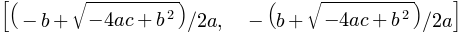

In [0]:
solve(a*x**2+b*x+c,x)

Természetesen a megoldás nem feltétlenül valós szám! A komplex egységgyököt a `sympy` `I`-vel jelöli:

In [0]:
I**2

A `solve` függvényt egyenletrendszerek megoldására is lehet használni. Ilyenkor a nullára rendezett egyenleteket listába foglaljuk. A keresett változókat szintúgy. Oldjuk meg a következő egyenletrendszert az $x$ és $y$ változókra:
$$y=x^2+ax-4b$$
$$y=x-b$$
Mivel $x$-ben másodrendű az első egyenlet, ezért két megoldáspárt várunk (A parabola legfeljebb két helyen metszi az egyenest...)

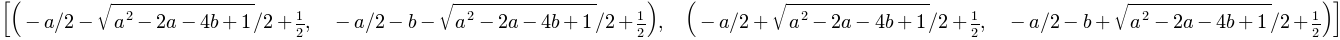

In [0]:
solve([x**2 + a*x - y, x - y - b],[x,y]) # Így kell egyenletrendszert megoldani


A `solve` függvény kimenete most egy lista, amelynek az elemei a megfelelő $(x,y)$ párok.

## Függvényanalízis

A `sympy` egyik legnagyobb előnye, hogy a `Python` nyelven belül lehetővé teszi egyszerűbb analízisbeli feladatok elvégzését. Alább a teljesség igénye nélkül összefoglalunk néhány egyszerű függvényt. Vizsgáljuk meg a következő két határértéket: $$\lim_{x\rightarrow 0}\frac{\sin x}{x}=? $$ illetve $$\lim_{x\rightarrow \infty}\frac{1}{1+\mathrm{e}^{-x}}=? $$ A határértéket a `limit` függvény segítségével tudjuk meghatározni:

In [0]:
limit(sin(x)/x,x,0)# sin(x)/x határértéke az x=0 pontban.

Ha a végtelenben vagyunk kíváncsiak a határértékre, akkor azt az `oo`-szimbólummal tudjuk elérni!

In [0]:
limit(1/(1+exp(-x)),x,oo)

Egy kifejezés deriváltjait a `diff` függvény segítségével tudjuk meghatározni. Például a $\sin$ függvény első $x$-szerinti deriváltja:

In [0]:
diff(sin(x),x)

A második deriváltat vagy így

In [0]:
diff(sin(x),x,x)

vagy így, (talán egy kicsit átláthatóbban) írjuk.

In [0]:
diff(sin(x),x,2)

Természetesen parciális deriváltak elvégzésére is van mód:

In [0]:
diff(sin(x)*cos(y),x,y)

A magasabb rendű parciális deriváltak legyártása az egyszerű deriváltak általánosításán alapszik:

In [0]:
diff(sin(x)*cos(y),x,2,y,3)

Az `integrate` függvény segítségével határozott és határozattlan integrálokat tudunk elvégezni.  

Határozzuk meg először az $x^2$ primitív függvényét:

In [0]:
integrate(x**2,x)

Az
$$\int_0^3 x^2\mathrm{d}x$$ határozott integrált pedig az alábbi módon értékelhetjük ki.

In [0]:
integrate(x**2,(x,0,3))

Természetesen az integrálás során szerepelhetnek a kifejezésben más paraméterek is:

In [0]:
integrate(x**2+y**3,(x,0,3))

Többváltozós integrált egyszerűen a változók (és ha határozott integrálról van szó, akkor az integrálási határok) egymás után írásával értékelhetünk ki:

A $$\int x^2+y^3 \mathrm{d}x\mathrm{d}y $$ határozatlan integrál:

In [0]:
integrate(x**2+y**3,x,y)

A
$$\int_0^3\int_{-3}^{5} x^2+y^3 \mathrm{d}x\mathrm{d}y $$ határozott integrál:

In [0]:
integrate(x**2+y**3,(x,0,3),(y,-3,5))